# EVALUACIÓN ML CON PYTHON: CHURN CLIENTES EMPRESA TELCO 

In [1]:
# Librerías utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.decomposition import PCA

# 1. Cargar datos y crear tablón

## Cargar tablas de diciembre y enero

In [2]:
# Lectura de datos diciembre
dic_clientes = pd.read_csv('diciembre/clientes_diciembre.csv', sep='|')
dic_financiacion = pd.read_csv('diciembre/financiacion_diciembre.csv', sep='|')
dic_consumos = pd.read_csv('diciembre/consumos_diciembre.csv', sep='|')
dic_productos = pd.read_csv('diciembre/productos_diciembre.csv', sep='|')

In [3]:
dic_clientes.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN
4,5,25,22.302845,08/29/1997 02:19 AM,Tarragona,2,2.0,NaN


In [4]:
# mergear distintas tablas por ID a la master de clientes
dic1 = pd.merge(dic_clientes, dic_financiacion, on='id', how='left')
dic1.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN
4,5,25,22.302845,08/29/1997 02:19 AM,Tarragona,2,2.0,NaN,NaN,NaN,NaN


In [5]:
dic2 = pd.merge(dic1, dic_consumos, on='id', how='left')
dic2.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN,110,79,10897,12806,13751
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI,189,89,18657,6499,10862
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI,129,30,15511,17013,16743
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN,51,52,12670,3393,6771
4,5,25,22.302845,08/29/1997 02:19 AM,Tarragona,2,2.0,NaN,NaN,NaN,NaN,183,3,23756,18436,4485


In [6]:
dic_final = pd.merge(dic2, dic_productos, on='id', how='left')
dic_final.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI,129,30,15511,17013,16743,ADSL,35MB,tv-futbol
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar
4,5,25,22.302845,08/29/1997 02:19 AM,Tarragona,2,2.0,NaN,NaN,NaN,NaN,183,3,23756,18436,4485,ADSL,10MB,tv-futbol


In [7]:
dic_final.shape

(95467, 19)

In [8]:
# Lo mismo con enero
    # Leer datos
ene_clientes = pd.read_csv('enero/clientes_enero.csv', sep='|')
ene_financiacion = pd.read_csv('enero/financiacion_enero.csv', sep='|')
ene_consumos = pd.read_csv('enero/consumos_enero.csv', sep='|')
ene_productos = pd.read_csv('enero/productos_enero.csv', sep='|')
    # Juntar tablas
ene1 = pd.merge(ene_clientes, ene_financiacion, on='id', how='left')
ene2 = pd.merge(ene1, ene_consumos, on='id', how='left')
ene_final = pd.merge(ene2, ene_productos, on='id', how='left')
ene_final.head() 

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN,95,19,6525,7634,18520,FIBRA,50MB,tv-futbol
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI,44,36,14471,14541,8016,FIBRA,600MB,tv-futbol
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI,94,27,1428,5248,7106,ADSL,35MB,tv-futbol
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN,186,20,20083,7372,5052,FIBRA,200MB,tv-familiar
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,NaN,NaN,NaN,37,32,19078,5009,8686,FIBRA,200MB,tv-futbol


In [9]:
ene_final.shape

(92711, 19)

## Crear variable target

Mi variable objetivo (target) son los clientes que se han ido o permanencen entre enero y diciembre

¿Cómo lo hago?

Unión de la tabla de enero a la de diciembre por ID con el método outer, creando una nueva columna que llamo target con 3 valores:
    - both: id que estan en las dos tablas, es decir, clientes que se han quedado
    - left only: solo estan en la tabla de diciembre, es decir, clientes que se han ido
    - right only: solo en la tabla de enero, es decir, clientes nuevos
Esta nueva columna target se une a diciembre con el método left de manera que tenemos los valores both y left_only que paso a dummy
    - 1 = Both, clientes que permanencen porque estan tanto en la tabla de diciembre como en la de enero
    - 0 = Left_only, clientes que se van porque estan solo en la tabla de diciembre

In [10]:
# Sacar variable target: quién se ha ido de diciembre a enero       
y = pd.merge(dic_final['id'], ene_final['id'], how='outer', indicator='target') 
# Me interesan los clientes que están en ambas columnas (both), es decir, permanecen 
# y los que están solo en diciembre (left_only), es decir, se han ido
# los que están solo en enero (right_only) no me interesan porque son nuevos clientes de enero

# Para ello junto esta nueva columna al dataframe de diciembre por left y así unirá solo las comunes o solo estén en diciembre
dic_final = pd.merge(dic_final, y, on= 'id', how='left')

In [11]:
# Paso a dummy mi nueva variable: 1 será si permanece, 0 si se va
dic_final['target'] = dic_final['target'].map( {'both': 1, 'left_only': 0} ).astype(int)

Cuento los valores distintos de mi nueva variable target, viendo que está bastante desbalanceada a favor de clientes que permanencen (1).
Esto va a influir en los modelos posteriores, creando una falsa impresión de que el modelo funciona bien u overfitting y lo tendré que tener en cuenta a la hora de mejorar el modelo.

In [12]:
print(dic_final.groupby('target').size())

target
0     7085
1    88382
dtype: int64


In [13]:
dic_final.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,imp_financ,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,target
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,NaN,NaN,NaN,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol,1
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,NaN,NaN,SI,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol,1
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,NaN,NaN,SI,129,30,15511,17013,16743,ADSL,35MB,tv-futbol,1
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,NaN,NaN,NaN,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar,1
4,5,25,22.302845,08/29/1997 02:19 AM,Tarragona,2,2.0,NaN,NaN,NaN,NaN,183,3,23756,18436,4485,ADSL,10MB,tv-futbol,0


# 2. Preprocesado y limpieza de datos

Para preprocesar los datos de las variables para realizar el modelo de clasificación tendré que transformar todas las variables a númericas (condición para que funcione Sklearn) y eliminar los valores nulos.

In [14]:
dic_final.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad         object
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
financiacion       object
imp_financ        float64
descuentos         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
conexion           object
vel_conexion       object
TV                 object
target              int32
dtype: object

In [15]:
# ¿Hay valores nulos?
dic_final.isnull().sum()

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt            88950
incidencia        90235
financiacion      89095
imp_financ        89095
descuentos        76313
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
conexion              0
vel_conexion          0
TV                    0
target                0
dtype: int64

In [16]:
# Separo variables
variables_categoricas = ['antiguedad', 'provincia', 'incidencia', 'financiacion', 'descuentos', 'conexion','vel_conexion','TV']
variables_numericas = ['id', 'edad','facturacion', 'num_lineas','num_dt', 'imp_financ','num_llamad_ent','num_llamad_sal','target']

In [17]:
# Recorro las categóricas para ver niveles
for i in variables_categoricas:
    print(dic_final[i].value_counts())

12/24/2003 04:39 PM    2
12/30/2008 04:29 PM    2
07/26/2018 05:02 AM    2
06/01/2011 01:32 PM    2
03/17/2019 04:53 AM    2
                      ..
08/14/2001 07:14 PM    1
03/16/2000 08:28 PM    1
07/04/1998 10:42 AM    1
12/21/2015 05:29 PM    1
01/29/1995 01:30 PM    1
Name: antiguedad, Length: 95171, dtype: int64
Zaragoza                  1991
Navarra                   1986
Málaga                    1973
Asturias                  1972
Valencia                  1972
Murcia                    1967
Orense                    1958
Alicante                  1954
Córdoba                   1949
Cáceres                   1945
Burgos                    1939
Guipúzcoa                 1936
Álava                     1932
Valladolid                1931
Sevilla                   1928
Huelva                    1924
Santa Cruz de Tenerife    1922
La Coruña                 1921
Segovia                   1917
Castellón                 1915
Granada                   1914
Tarragona                 19

In [18]:
# Paso a binarias las que solo toman dos valores 
categoricas_binarias = ['incidencia','financiacion','descuentos']
for j in categoricas_binarias:
    dic_final[j] = [1 if x == 'SI' else 0 for x in dic_final[j]]

In [19]:
# conexión, vel_conexion y TV paso a numéricas 
dic_final.conexion.replace(('ADSL','FIBRA'),
                      (1,2),inplace=True)

dic_final.TV.replace(('tv-futbol','tv-familiar','tv-total'),
                      (1,2,3),inplace=True)

In [20]:
#vel_conexion lo hago quitando el MB del final
dic_final['vel_conexion'] = dic_final['vel_conexion'].astype(str)
dic_final['vel_conexion'] = dic_final['vel_conexion'].str.replace('MB','')
dic_final['vel_conexion'] = dic_final['vel_conexion'].astype(int)

In [21]:
# antiguedad en días: fecha de hoy - fecha alta 
dic_final['antiguedad'] = dic_final['antiguedad'].astype('datetime64[ns]')
antiguedad = (datetime.now() - dic_final['antiguedad']).dt.days
dic_final['antiguedad'] = antiguedad

In [22]:
# provincia con LabelEncoder para pasar a numérica
transform1 = LabelEncoder()
transform1.fit_transform(['La Rioja', 'Vizcaya', 'Albacete', 'Lugo', 'Tarragona', 'Huelva',
       'Lérida', 'La Coruña', 'Alicante', 'Madrid', 'Córdoba',
       'Las Palmas', 'Soria', 'Zamora', 'Valladolid', 'Granada',
       'Palencia', 'Burgos', 'Teruel', 'Navarra', 'Guipúzcoa', 'Valencia',
       'Málaga', 'Sevilla', 'Huesca', 'Cádiz', 'Jaén', 'Cuenca',
       'Badajoz', 'Almería', 'Ciudad Real', 'Salamanca', 'Pontevedra',
       'Segovia', 'Asturias', 'Islas Baleares', 'Álava', 'Cáceres',
       'Orense', 'Cantabria', 'Zaragoza', 'Murcia', 'León', 'Toledo',
       'Guadalajara', 'Ávila', 'Santa Cruz de Tenerife', 'Castellón',
       'Gerona', 'Barcelona'])

dic_final['provincia'] = transform1.transform(dic_final['provincia'])

In [23]:
dic_final.dtypes # ya son todas numéricas

id                  int64
edad                int64
facturacion       float64
antiguedad          int64
provincia           int32
num_lineas          int64
num_dt            float64
incidencia          int64
financiacion        int64
imp_financ        float64
descuentos          int64
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
conexion            int64
vel_conexion        int32
TV                  int64
target              int32
dtype: object

In [24]:
# ¿Cómo voy de nulos?
dic_final.isnull().sum()

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt            88950
incidencia            0
financiacion          0
imp_financ        89095
descuentos            0
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
conexion              0
vel_conexion          0
TV                    0
target                0
dtype: int64

In [25]:
# imp_financ y financiacion tenían el mismo número de nulos por lo que tiene sentido que si financiacion es 0 también lo sea imp_financ
# num_dt que sean NaNs también serán 0

# relleno el dataframe con 0
dic_final = dic_final.fillna(value=0)

In [26]:
dic_final.isnull().sum() # ya no hay nulos

id                0
edad              0
facturacion       0
antiguedad        0
provincia         0
num_lineas        0
num_dt            0
incidencia        0
financiacion      0
imp_financ        0
descuentos        0
num_llamad_ent    0
num_llamad_sal    0
mb_datos          0
seg_llamad_ent    0
seg_llamad_sal    0
conexion          0
vel_conexion      0
TV                0
target            0
dtype: int64

In [27]:
# Redondeo a dos decimales de facturación
dic_final['facturacion'] = round(dic_final['facturacion'], 2)

Intuyo que mi modelo va a tener overfitting por el desbalanceo de la variable target, que lo trataré en el apartado de mejora de modelos.

Otra razón que produce overfitting es la colinealidad de las variables, por lo que voy a hacer un estudio VIF y eliminar aquella variable que tenga el mayor VIF y que este sea mayor de 5.

In [28]:
# Obtención del valor VIF para eliminar colinealidad (la colinealidad implica overfitting en el modelo)
# Se calcula el valor VIF de todas las variables menos la target
dic_vif = dic_final.copy(deep = True)
features = list(dic_final.columns)
features.remove('target')
dic_vif = dic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dic_vif[fet]
    y = dic_final[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0000988154227723
El valor del VIF para la variable edad es: 1.0003287546924162
El valor del VIF para la variable facturacion es: 1.345735086211395
El valor del VIF para la variable antiguedad es: 1.000131480178701
El valor del VIF para la variable provincia es: 1.0002323806453326
El valor del VIF para la variable num_lineas es: 1.277013814644401
El valor del VIF para la variable num_dt es: 1.0001711897382748
El valor del VIF para la variable incidencia es: 1.0001499117789374
El valor del VIF para la variable financiacion es: 5.470001339580454
El valor del VIF para la variable imp_financ es: 5.470634733735551
El valor del VIF para la variable descuentos es: 1.00025404278318
El valor del VIF para la variable num_llamad_ent es: 1.0002718881843355
El valor del VIF para la variable num_llamad_sal es: 1.0000950332702312
El valor del VIF para la variable mb_datos es: 1.000123450770747
El valor del VIF para la variable seg_llamad_ent es: 1.00022197155

In [29]:
# Se elimina la variable con mayor VIF y como ya todas tienen un valor VIF menor de 5 no existen variables con colinealidad
features = list(dic_vif.columns)
features.remove('imp_financ')
dic_vif = dic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dic_vif[fet]
    y = dic_final[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0000977823687665
El valor del VIF para la variable edad es: 1.0003231216815236
El valor del VIF para la variable facturacion es: 1.3456203944780303
El valor del VIF para la variable antiguedad es: 1.0001275282671813
El valor del VIF para la variable provincia es: 1.000230763376868
El valor del VIF para la variable num_lineas es: 1.276983293403767
El valor del VIF para la variable num_dt es: 1.0001709545226112
El valor del VIF para la variable incidencia es: 1.0001336374398677
El valor del VIF para la variable financiacion es: 1.000933472955092
El valor del VIF para la variable descuentos es: 1.000228948116488
El valor del VIF para la variable num_llamad_ent es: 1.0002171203447046
El valor del VIF para la variable num_llamad_sal es: 1.0000945357472582
El valor del VIF para la variable mb_datos es: 1.000109087406071
El valor del VIF para la variable seg_llamad_ent es: 1.000187113361469
El valor del VIF para la variable seg_llamad_sal es: 1.00017

In [30]:
dic_final = dic_final.drop(['imp_financ'], axis=1)
dic_final.head() # tabla de diciembre limpia

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,target
0,1,63,216.03,502,23,5,0.0,0,0,0,110,79,10897,12806,13751,2,50,1,1
1,2,84,255.83,960,45,3,0.0,0,0,1,189,89,18657,6499,10862,2,600,1,1
2,3,66,135.77,6677,0,4,0.0,0,0,1,129,30,15511,17013,16743,1,35,1,1
3,4,69,255.66,1705,26,4,0.0,0,0,0,51,52,12670,3393,6771,2,200,2,1
4,5,25,22.30,8258,40,2,2.0,0,0,0,183,3,23756,18436,4485,1,10,1,0


# 3. Conjuntos train y test

Separación del conjunto de datos en train y test. El 80% de los datos de diciembre los voy a utilizar para entrenar el modelo mientras que el 20% restante servirán para validarlo.

Aquí también observamos que la variable target está desbalanceada.

In [31]:
dic_final.set_index(['id'], inplace=True) #id lo convierto en índice de la tabla
dic_final.head()

,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,financiacion,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,target
id,,,,,,,,,,,,,,,,,,
1,63,216.03,502,23,5,0.0,0,0,0,110,79,10897,12806,13751,2,50,1,1
2,84,255.83,960,45,3,0.0,0,0,1,189,89,18657,6499,10862,2,600,1,1
3,66,135.77,6677,0,4,0.0,0,0,1,129,30,15511,17013,16743,1,35,1,1
4,69,255.66,1705,26,4,0.0,0,0,0,51,52,12670,3393,6771,2,200,2,1
5,25,22.30,8258,40,2,2.0,0,0,0,183,3,23756,18436,4485,1,10,1,0


In [32]:
# Definición de variables
y = pd.DataFrame(dic_final['target']) #objetivo
x = pd.DataFrame(dic_final.iloc[:,:-1]) #todas menos la target y la variabla colineal (imp_financ ya eliminada)

In [33]:
# Creación de train y test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [34]:
# Comprobar longitud
len(x_train)

76373

In [35]:
len(x_test)

19094

In [36]:
len(y_train)

76373

In [37]:
len(y_test)

19094

In [38]:
y_train2 = pd.DataFrame(y_train) 
y_train2['target'].value_counts()

1    70673
0     5700
Name: target, dtype: int64

In [39]:
y_test2 = pd.DataFrame(y_test) 
y_test2['target'].value_counts()

1    17709
0     1385
Name: target, dtype: int64

Nota: estas dos distribuciones cambian ligeramente cada vez que se ejecuta el ejercicio. Eso puede influir ligeramente en los resultados de los posteriores modelos

In [40]:
# Comprobar que tanto en train como en test el % de 0 y 1 es el mismo
y_train_1 = round(70673/76373,2)
y_train_1

0.93

In [41]:
y_test_1 = round(17709/19094,2)
y_test_1

0.93

# 4. Modelos de clasificación con limpieza de datos básica

A continuación se muestran varios modelos de clasificación estudiados en el módulo. 

Para evaluar los modelos nos fijamos en la métrica de la función saca_métricas:

### Métricas:

- La **matriz de confusión** nos muestra la efectividad del modelo, cuánto acierta y cuánto falla. 
Todos los modelos mostrados a continuación tienen un alto índice de predicciones correctas (dadas con la diagonal principal) sobre todo, de verdaderos positivos, a excepción del modelo SVC que no cuenta con casos negativos (ni falsos ni reales). Bien es cierto, que los datos de entrada tiene mayor porcentaje de 1 que de 0, lo que influye en el desequilibrio de verdaderos positivos con respecto a verdaderos negativos

- Puesto que las matrices de confusión tienen un alto índice de predicciones correctas se refleja en el resto de métricas:
    - **Accuracy**: es alta puesto que el número de verdaderos positivos de la matriz de confusión es alto
    - **Precision**: la dispersión de los valores obtenidos es muy baja, pues la proporción de predicciones correctas es alta, por ello, la precisión es buena
    - **Recall** o tasa de verdaderos positivos: la proporción de casos positivos (clientes que se quedan en la compañía) que han sido correctamente identificados por el algoritmo es también alta
    - **F1** o combinación del Accuracy y Precision del modelo: puesto que ambas son altas, también lo es el F1
    
- La **curva ROC** nos muestra la sensibilidad frente a la especificidad, es decir, el ratio de verdaderos positivos frente a falsos positivos. 
Nos fijamos en el área que queda bajo esta curva, siendo lo óptimo AUC = 1 y lo peor AUC = 0.5
    - Los modelos de Regresión logística y Árbol de decisión dan un AUC de 0.87 y 0.89 respectivamente, bastante buenos 
    - El modelo SVC nos da una AUC = 0.5, lo peor que nos podría salir ya que demuestra total azar. (Nota: tarda muchísimo en ejecutarse, no lo recomiendo si lo estás ejecutando para la correción)
    - El Naives Bayes nos dan un AUC excelente, 0.92 

In [45]:
# Función dada en clase para sacar métricas de evaluación del modelo
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

### Modelo 1: Regresión logística

In [46]:
classifier = LogisticRegression().fit(x_train, y_train)
y_pred     = classifier.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


matriz de confusión
[[ 1053   332]
 [  298 17411]]
accuracy
0.9670053419922489
precision
0.9812883954235473
recall
0.9831723982155965
f1
0.982229493399526
AUC
0.8717306034399284


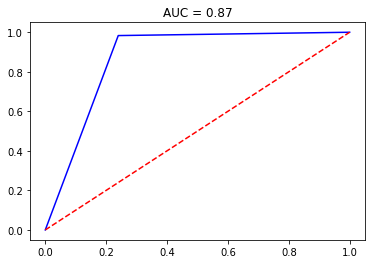

In [47]:
saca_metricas(y_test, y_pred)

### Modelo 2: Árbol de decisión

In [48]:
dt_classifier = DecisionTreeClassifier().fit(x_train, y_train)
y_pred        = dt_classifier.predict(x_test)

matriz de confusión
[[ 1107   278]
 [  245 17464]]
accuracy
0.9726091966062638
precision
0.9843309660692143
recall
0.9861652267208764
f1
0.9852472426729851
AUC
0.8927216025301133


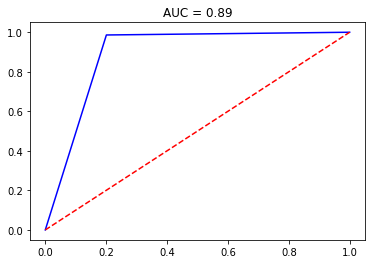

In [49]:
saca_metricas(y_test, y_pred)

### Modelo 3: SVC

In [50]:
svm_classifier = SVC().fit(x_train, y_train)
y_pred         = svm_classifier.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


matriz de confusión
[[    0  1385]
 [    0 17709]]
accuracy
0.9274641248559757
precision
0.9274641248559757
recall
1.0
f1
0.9623671983262234
AUC
0.5


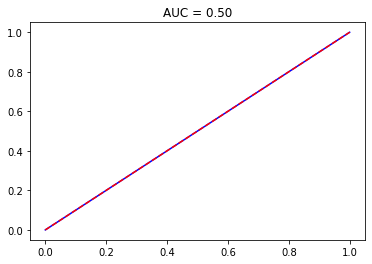

In [51]:
saca_metricas(y_test, y_pred)

### Modelo 4: Naive Bayes

In [53]:
nb_classifier = naive_bayes.GaussianNB().fit(x_train, y_train)
y_pred        = nb_classifier.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


matriz de confusión
[[ 1188   197]
 [  438 17271]]
accuracy
0.9667434796271079
precision
0.9887222349438974
recall
0.9752668134846688
f1
0.9819484322142309
AUC
0.9165142731683272


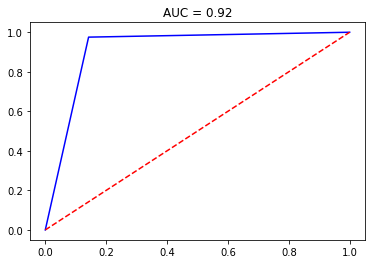

In [54]:
saca_metricas(y_test, y_pred)

# 5. Mejora de modelos

Los modelos anteriores es muy probable que tengan overfitting, a continuación voy a realizar varias mejoras para obtener resultados más fiables a la par de mejores:
    1. Creación de nuevas variables
    2. Selección de variables a entrar en el modelo
    3. Corrección del modelo de Regresión logística
    4. Ensamblado de modelos:
        4.1. Bagging 
        4.2. Boosting
    5. Validación cruzada de los nuevos modelos
    6. Selección del mejor modelo

## 5.1. Feature engineering

Transformación de variables con el objetivo de que se comporten mejor con respecto a la variable objetivo

In [55]:
# Función dada en clase para sacar gráficos que se ve como se comportan las categorías de las variables con respecto a la target
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%clientes'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%clientes']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%clientes'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%clientes',data=proporcion_filtered, fit_reg=True,ci=None)

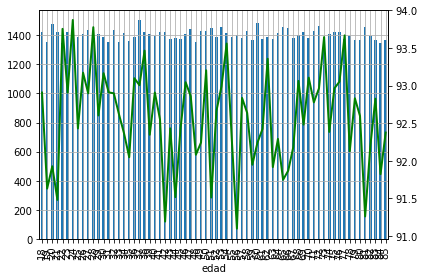

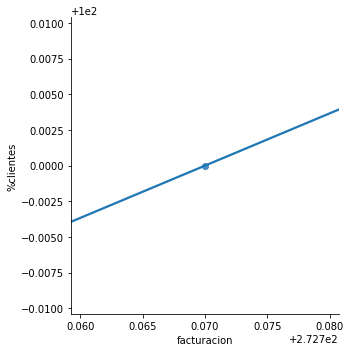

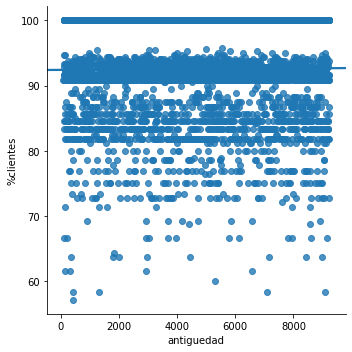

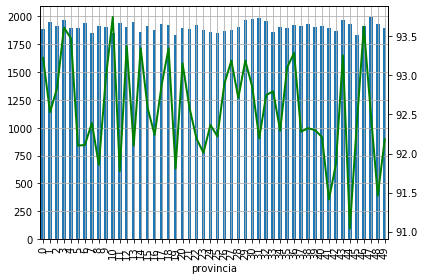

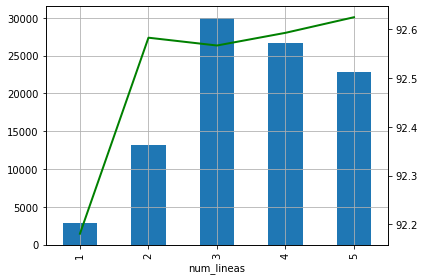

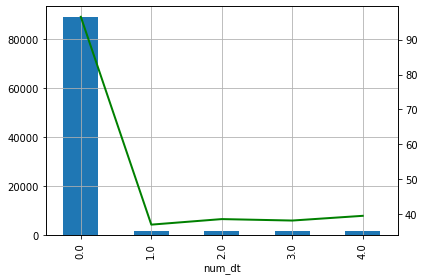

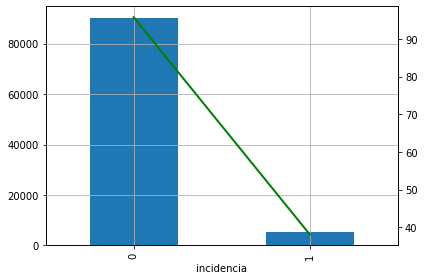

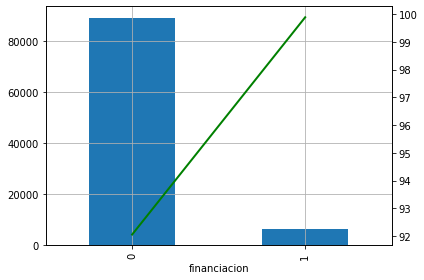

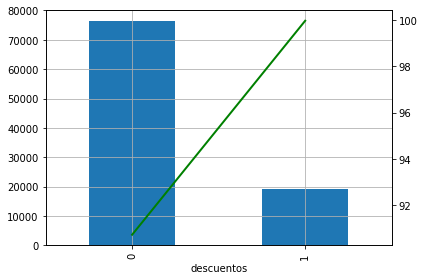

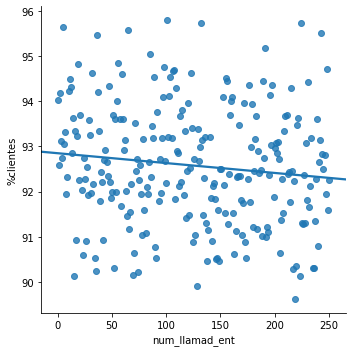

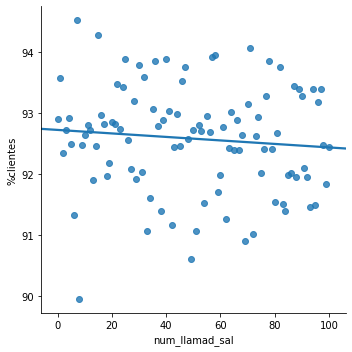

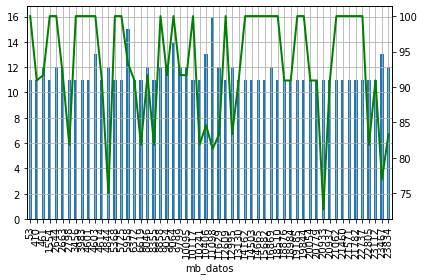

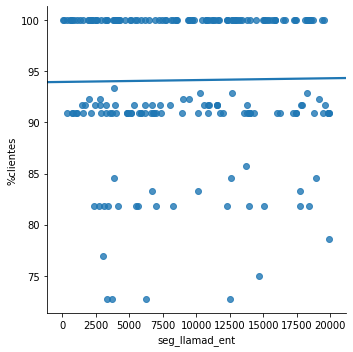

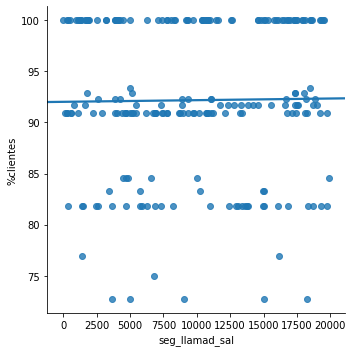

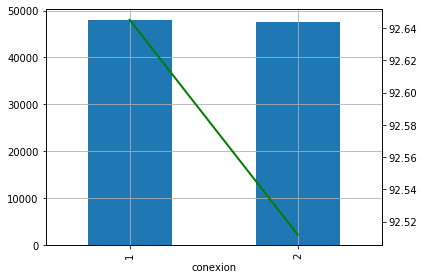

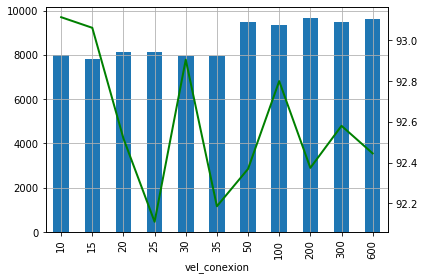

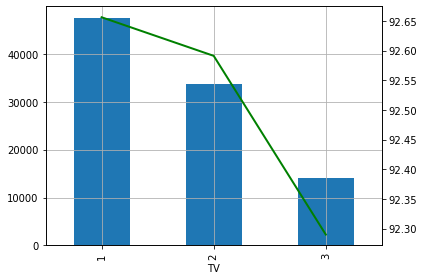

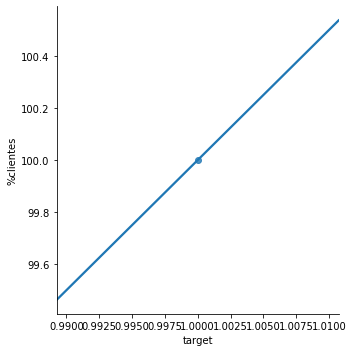

In [56]:
for i in dic_final.columns:
    proporciones_final (i, 'target', dic_final)

Las barras de las variables muestran como se distribuye la variable.

La línea muestra como se comporta la variable frente a la target, observando esto con algunas variables junto categorías:

In [57]:
# num_dt (número de líneas impagadas) la convierto en binaria: 0 = no tiene, 1 = tiene
dic_final['fe_num_dt'] = dic_final['num_dt'] .apply(lambda x: 0 if x==0 else 1)

# vel_conexion hago 4 categorías en función del ancho de banda de bajo a muy alto
dic_final['vel_conexion_baja']  = dic_final['vel_conexion'].apply(lambda x: 1 if x<25 else 0)
dic_final['vel_conexion_media'] = dic_final['vel_conexion'].apply(lambda x: 1 if x>=25 & x<=35 else 0)
dic_final['vel_conexion_alta'] = dic_final['vel_conexion'].apply(lambda x: 1 if x>35 & x<200 else 0)
dic_final['vel_conexion_muyalta'] = dic_final['vel_conexion'].apply(lambda x: 1 if x>=200 else 0)  
dic_final['fe_vel_conexion'] = dic_final['vel_conexion'].apply(lambda x: 1 if x<25 else(2 if x>=25 and x<=35 else(3 if x>35 and x<200 else(4))))

In [58]:
# Quito las variables originales ya que entran las nuevas (fe_)
dic_final = dic_final.drop(columns=['num_dt','vel_conexion'])

In [59]:
dic_final.columns

Index(['edad', 'facturacion', 'antiguedad', 'provincia', 'num_lineas',
       'incidencia', 'financiacion', 'descuentos', 'num_llamad_ent',
       'num_llamad_sal', 'mb_datos', 'seg_llamad_ent', 'seg_llamad_sal',
       'conexion', 'TV', 'target', 'fe_num_dt', 'vel_conexion_baja',
       'vel_conexion_media', 'vel_conexion_alta', 'vel_conexion_muyalta',
       'fe_vel_conexion'],
      dtype='object')

## 5.2. Selección de variables

De todas las variables que tengo, las dadas en el csv + las creadas, realizo una selección de variables por varios métodos para quedarme con las que mejor se vayan a comportar en el modelo.

Métodos:
- Eliminar variables de baja varianza
- Análisis univariante
- PCA o análisis de componentes principales

In [60]:
# Vuelvo a definir x e y con las nuevas variables
y = pd.DataFrame(dic_final['target']) #objetivo
x = pd.DataFrame(dic_final.loc[:, dic_final.columns != 'target'])
x.columns

Index(['edad', 'facturacion', 'antiguedad', 'provincia', 'num_lineas',
       'incidencia', 'financiacion', 'descuentos', 'num_llamad_ent',
       'num_llamad_sal', 'mb_datos', 'seg_llamad_ent', 'seg_llamad_sal',
       'conexion', 'TV', 'fe_num_dt', 'vel_conexion_baja',
       'vel_conexion_media', 'vel_conexion_alta', 'vel_conexion_muyalta',
       'fe_vel_conexion'],
      dtype='object')

#### Eliminar variables con baja varianza

Con un umbral del 60% voy a eliminar las variables con menor varianza, de manera que de las 21 variables originales que tenía me selecciona 11. Las más importantes para el modelo.

In [61]:
var_th = VarianceThreshold(threshold = 0.60) 
x_var = var_th.fit_transform(x) 

In [62]:
x.shape[1] # variables principales

21

In [63]:
x_var.shape[1] # variables finales

11

In [64]:
variables1 = list(np.asarray(list(x))[var_th.get_support()])
variables1.sort()
variables1

['antiguedad',
 'edad',
 'facturacion',
 'fe_vel_conexion',
 'mb_datos',
 'num_lineas',
 'num_llamad_ent',
 'num_llamad_sal',
 'provincia',
 'seg_llamad_ent',
 'seg_llamad_sal']

#### Análisis univariante

Otra metodología para seleccionar variables influyentes para el modelo es a través del análisis univariante. En esta caso le digo que sean las 11 variables más influyentes.

In [65]:
S_chi = SelectKBest(chi2, k = 11)
X_chi = S_chi.fit_transform(x, y)

variables2 = list(np.asarray(list(x))[S_chi.get_support()])
variables2.sort()
variables2

['antiguedad',
 'descuentos',
 'facturacion',
 'fe_num_dt',
 'financiacion',
 'incidencia',
 'mb_datos',
 'num_llamad_ent',
 'num_llamad_sal',
 'provincia',
 'seg_llamad_ent']

#### PCA

El estudio de componentes principales sirve para ver aquellas variables que son más significativas para el modelo, aquellas que tienen mayor valor predictivo. Y así quedarnos con estas variables más valiosas, las llamadas componentes principales.

Calcula la proporción de variación explicada, es decir, las varianzas de las variables hasta alcanzar un mínimo que especifiquemos, y nos quedaríamos con esas variables.

En este caso TODAS varianzas son MUY BAJAS por lo que no es no concluyente. 

In [66]:
pca = PCA(n_components = 11)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.16528294e-01, 2.64567556e-01, 2.63345083e-01, 5.51530398e-02,
       2.53991740e-04, 9.87771458e-05, 4.17797868e-05, 6.74867539e-06,
       3.04995494e-06, 1.66179309e-06, 7.42945436e-09])

### Selección final

Me quedo con una combinación de las variables dadas por el análisis univariante y la eliminación de las de baja varianza.
Hago un análisis VIF de estas para evitar la colinaealidad

In [67]:
dic_final = dic_final.drop(columns=['conexion', 'TV', 'vel_conexion_baja',
       'vel_conexion_media', 'vel_conexion_alta', 'vel_conexion_muyalta'])

In [68]:
dic_final.columns

Index(['edad', 'facturacion', 'antiguedad', 'provincia', 'num_lineas',
       'incidencia', 'financiacion', 'descuentos', 'num_llamad_ent',
       'num_llamad_sal', 'mb_datos', 'seg_llamad_ent', 'seg_llamad_sal',
       'target', 'fe_num_dt', 'fe_vel_conexion'],
      dtype='object')

In [69]:
dic_vif = dic_final.copy(deep = True)
features = list(dic_final.columns)
features.remove('target')
dic_vif = dic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dic_vif[fet]
    y = dic_final[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable edad es: 1.000323088555577
El valor del VIF para la variable facturacion es: 1.2706282335934536
El valor del VIF para la variable antiguedad es: 1.0001112804609884
El valor del VIF para la variable provincia es: 1.0002026828906785
El valor del VIF para la variable num_lineas es: 1.2703149903442725
El valor del VIF para la variable incidencia es: 1.000116611478586
El valor del VIF para la variable financiacion es: 1.000807433544459
El valor del VIF para la variable descuentos es: 1.0002266575933263
El valor del VIF para la variable num_llamad_ent es: 1.0001700001043892
El valor del VIF para la variable num_llamad_sal es: 1.000060125547735
El valor del VIF para la variable mb_datos es: 1.0000878608516497
El valor del VIF para la variable seg_llamad_ent es: 1.0001564021947396
El valor del VIF para la variable seg_llamad_sal es: 1.0001348628318496
El valor del VIF para la variable fe_num_dt es: 1.0001641209929921
El valor del VIF para la variable fe_vel_co

No hay ningún VIF mayor de 5, por lo tanto, no tengo variables colineales

### Train-Test con las nuevas variables seleccionadas

In [70]:
# Definición de variables
y = pd.DataFrame(dic_final['target']) #objetivo
x = pd.DataFrame(dic_final.loc[:, dic_final.columns != 'target'])

In [71]:
# Creación de train y test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

#FALTARÍA EL ESTRATIFICADO:
# x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify = y)

## 5.3. Modelo regresión logística de nuevo

Realizo de nuevo el modelo de Regresión logística, esta vez con las nuevas variables seleccionadas e incluyendo la penalización de parámetros L2 y balanceo de variables para evitar el overfitting.

In [72]:
classifier2 = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced").fit(x_train, y_train)
y_pred = classifier2.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


matriz de confusión
[[ 1403     6]
 [  278 17407]]
accuracy
0.9851262176599979
precision
0.9996554298512605
recall
0.9842804636697766
f1
0.9919083708473416
AUC
0.9900110622110417


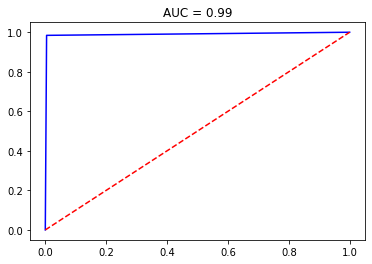

In [73]:
saca_metricas(y_test, y_pred)

## 5.4. Ensamblado de modelos

A continuación vemos dos metodologías para el ensamblado de modelos. En ambas, a partir de un algoritmo inicial se obtiene otro algoritmo "ensamblado" con mejores resultados.

### 5.4.1. Bagging

A partir del algoritmo inicial va realizando mejoras en paralelo para finalmente realizar un modelo "ensamblado" con el promedio de los resultados.

Como resultado reduce el overfitting y la varianza.

En esta ocasion he realizado el bagging del modelo de Árbol de decisión, mejorando notablemente el resultado.
Un modelo de bagging mejorado es el Random Forest, por ello veo resultados similares.

In [74]:
bbc = DecisionTreeClassifier(max_depth=2, random_state=0).fit(x_train, y_train)
y_pred = bbc.predict(x_test)

matriz de confusión
[[ 1403     6]
 [  560 17125]]
accuracy
0.9703571802660521
precision
0.9996497577491098
recall
0.9683347469607012
f1
0.9837431066176472
AUC
0.982038203856504


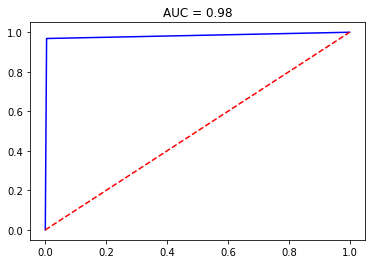

In [75]:
saca_metricas(y_test, y_pred)

#### Random forest

In [76]:
rf_classifier = RandomForestClassifier().fit(x_train, y_train)
y_pred        = rf_classifier.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


matriz de confusión
[[ 1381    28]
 [  257 17428]]
accuracy
0.9850738451869697
precision
0.9983959670027498
recall
0.9854679106587504
f1
0.9918898153154435
AUC
0.9827978304180907


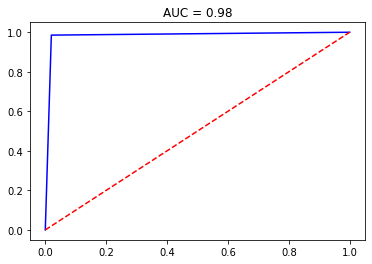

In [77]:
saca_metricas(y_test, y_pred)

## 5.4.2. Boosting

Partiendo de un modelo inicial, intenta construir nuevos modelos que funcionan bien allí donde los anteriores han fallado. Es decir, corrige los errores del modelo anterior creando uno nuevo mejor.

Un ejemplo es el modelo XGBoost.

#### XGBoost

In [78]:
# Instalar xgboost
import sys
!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier

In [79]:
# Modelo
xgb = XGBClassifier(base_score=0.7, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1).fit(x_train, y_train)
y_pred = xgb.predict(x_test)

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


matriz de confusión
[[ 1403     6]
 [  266 17419]]
accuracy
0.985754687336336
precision
0.9996556671449067
recall
0.984959004806333
f1
0.9922529193961834
AUC
0.9903503327793198


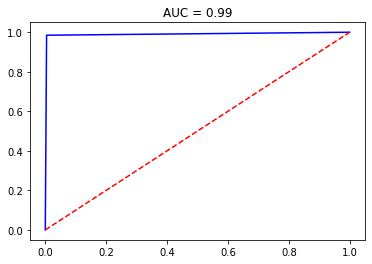

In [80]:
saca_metricas(y_test, y_pred)

## 5.5. Validación cruzada

Los buenos resultados me hacen seguir pensando la existencia de overfitting pero tras realizar la validación cruzada con 5 pliegues y ver la baja varianza y que los resultados en media siguen siendo buenos, concluyo que será debido a la aleatoriedad en la creación de los datos. 

### Segundo modelo de regresión logística

In [81]:
results = cross_val_score(estimator=classifier2, X=x_train, y=y_train, cv=5)
print(results)
print(results.mean())
print(results.std())

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\v

[0.983569   0.98376432 0.98193008 0.98101349 0.98193008]
0.982441391877504
0.0010567338533925435


C:\Users\isabe\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


### Segundo Árbol de decisión

In [82]:
results2 = cross_val_score(estimator=bbc, X=x_train, y=y_train, cv=5)
print(results)
print(results2.mean())
print(results2.std())

[0.983569   0.98376432 0.98193008 0.98101349 0.98193008]
0.9669253772413426
0.0020947198998403954


### XGBoost

In [83]:
results4 = cross_val_score(estimator=xgb, X=x_train, y=y_train, cv=5)
print(results)
print(results4.mean())
print(results4.std())

C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.983569   0.98376432 0.98193008 0.98101349 0.98193008]
0.9832401099808186
0.0009726217098777693


## 5.6. Modelo ganador

Con los nuevos modelos hechos en el este apartado 5 vemos que la mayor mejora se ha producido en el modelo de **Regresión logística** gracias a la selección de variables y penalización de parámetros. Además, la validación cruzada me ha demostrado que no son valores casuales.

El resultado es muy bueno, demasiado diría yo... y puesto que es fácil de intepretar lo escojo para llevar a "producción" y testear los valores de enero.

# 6. Predicción con datos de enero

## Limpieza de enero para que sea similar a diciembre

In [84]:
# Pasar cateróricas a númericas binarias
categoricas_binarias = ['incidencia','financiacion','descuentos']
for j in categoricas_binarias:
    ene_final[j] = [1 if x == 'SI' else 0 for x in ene_final[j]]
    
# vel_conexion
ene_final['vel_conexion'] = ene_final['vel_conexion'].astype(str)
ene_final['vel_conexion'] = ene_final['vel_conexion'].str.replace('MB','')
ene_final['vel_conexion'] = ene_final['vel_conexion'].astype(int)

# antiguedad 
ene_final['antiguedad'] = ene_final['antiguedad'].astype('datetime64[ns]')
antiguedad = (datetime.now() - ene_final['antiguedad']).dt.days
ene_final['antiguedad'] = antiguedad

# CORREGIR ANTIGUEDAD CON 31 DE ENERO, NO DATETIME.NOW
# ene_final['antiguedad'] = ene_final['antiguedad'].astype('datetime64[ns]')
# antiguedad = (31-01-2020 - ene_final['antiguedad']).dt.days
# ene_final['antiguedad'] = antiguedad

# provincia 
transform1 = LabelEncoder()
transform1.fit_transform(['La Rioja', 'Vizcaya', 'Albacete', 'Lugo', 'Tarragona', 'Huelva',
       'Lérida', 'La Coruña', 'Alicante', 'Madrid', 'Córdoba',
       'Las Palmas', 'Soria', 'Zamora', 'Valladolid', 'Granada',
       'Palencia', 'Burgos', 'Teruel', 'Navarra', 'Guipúzcoa', 'Valencia',
       'Málaga', 'Sevilla', 'Huesca', 'Cádiz', 'Jaén', 'Cuenca',
       'Badajoz', 'Almería', 'Ciudad Real', 'Salamanca', 'Pontevedra',
       'Segovia', 'Asturias', 'Islas Baleares', 'Álava', 'Cáceres',
       'Orense', 'Cantabria', 'Zaragoza', 'Murcia', 'León', 'Toledo',
       'Guadalajara', 'Ávila', 'Santa Cruz de Tenerife', 'Castellón',
       'Gerona', 'Barcelona'])
ene_final['provincia'] = transform1.transform(ene_final['provincia'])

# Redondear decimales de facturación
ene_final['facturacion'] = round(ene_final['facturacion'], 2)

# Nuevas variables
ene_final['fe_num_dt'] = ene_final['num_dt'] .apply(lambda x: 0 if x==0 else 1)  
ene_final['fe_vel_conexion'] = ene_final['vel_conexion'].apply(lambda x: 1 if x<25 else(2 if x>=25 and x<=35 else(3 if x>35 and x<200 else(4))))

# Quitar variables colineales, las que he eliminé en la selección y las transformadas
ene_final = ene_final.drop(columns=['imp_financ', 'conexion', 'TV', 'num_dt', 'vel_conexion'])

# TABLÓN FINAL
ene_final.set_index(['id'], inplace=True)
ene_final.head()

,edad,facturacion,antiguedad,provincia,num_lineas,incidencia,financiacion,descuentos,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,fe_num_dt,fe_vel_conexion
id,,,,,,,,,,,,,,,
1,63,216.03,502,23,5,0,0,0,95,19,6525,7634,18520,1,3
2,84,255.83,960,45,3,0,0,1,44,36,14471,14541,8016,1,4
3,66,135.77,6677,0,4,0,0,1,94,27,1428,5248,7106,1,2
4,69,255.66,1705,26,4,0,0,0,186,20,20083,7372,5052,1,4
6,51,99.35,8191,18,4,0,0,0,37,32,19078,5009,8686,1,4


## Modelo con datos enero

El modelo ganador/escogido es el segundo de Regresión logística por lo que realizo la predicción con él para la cosecha de enero 2020.

Recuerdo que mi target está definida como:
- 1: clientes que se quedan
- 0: clientes que se van

Por lo que en este caso se observa la **probabilidad de quedarse en la compañía** de cada cliente, identificado por su id.


In [85]:
# El modelo elegido es el segundo de regresión logística (classifier2)
modelo_proba = classifier2.predict_proba(ene_final)[:,1]
modelo_proba = (pd.DataFrame(modelo_proba,columns=['probabilidad'],index=ene_final.index))
modelo_proba.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [86]:
# Clientes (ID) y su probabilidad de quedarse
modelo_proba

,probabilidad
id,
2568,0.999943
12478,0.999942
36822,0.999941
62205,0.999940
80276,0.999940
...,...
47142,0.000005
56049,0.000005
44813,0.000005


### Campaña de fidelización

Por ejemplo, puedo lanzar una campaña de fidelización a todos aquellos clientes que tienen una probabilidad de quedarse inferior al 70%, que son un 74% del total de clientes de enero.

In [87]:
# Clientes con probabilidad de quedarse inferior al 70%
modelo_proba_filter = modelo_proba[modelo_proba['probabilidad'] <= 0.70]
modelo_proba_filter

,probabilidad
id,
30859,0.034418
44096,0.032023
37819,0.031951
69625,0.031899
41378,0.031825
...,...
47142,0.000005
56049,0.000005
44813,0.000005


In [88]:
clientes_altaprob = int(round((68623/92711)*100,0))
print(clientes_altaprob,'%', sep='')

74%


En vez de la probabilidad de quedarse, puedo predicir directamente si el cliente se quedará (1) o se irá (0) en el siguiente mes.

Los valores son similares a la probabilidad de quedarse inferior al 70%:
- Se irán 68623 clientes, un 75%
- Se quedarán 24088, un 25%

In [89]:
prediccion = classifier2.predict(ene_final)
prediccion = (pd.DataFrame(prediccion,columns=['churn'],index=ene_final.index))
prediccion

,churn
id,
1,0
2,1
3,1
4,0
6,0
...,...
99996,0
99997,1
99998,0


In [90]:
prediccion['churn'].value_counts()

0    68623
1    24088
Name: churn, dtype: int64

### Ejemplo

Características de este cliente que está en el dataframe de enero en la posición 8, su Id corresponde al 11:
- Tiene 64 años
- Paga 391.69 € al mes
- Lleva en la compañía 5679 días
- Es de la provincia 13, es decir, de Zamora
- Tiene 5 líneas
- No ha tenido incidencias
- No tiene financiacion
- Tiene descuentos aplicados
- Le entran 97 llamadas entre sus 5 líneas
- Realiza 43 llamadas entre sus 5 líneas
- Consume 10961 MB
- Ha consumido 10288 segundos en llamadas entrantes entre sus 5 líneas
- Ha consumido 13798 segundos en llamadas salientes entre sus 5 líneas
- Tiene líneas impagadas 
- Su ancho de banda es bajo, de la categoría 1

Este cliente tiene una probabilidad de quedarse en la compañía del 98%.

In [91]:
print(ene_final.iloc[8])

edad                  64.00
facturacion          391.69
antiguedad          5684.00
provincia             13.00
num_lineas             5.00
incidencia             0.00
financiacion           0.00
descuentos             1.00
num_llamad_ent        97.00
num_llamad_sal        43.00
mb_datos           10961.00
seg_llamad_ent     10288.00
seg_llamad_sal     13798.00
fe_num_dt              1.00
fe_vel_conexion        1.00
Name: 11, dtype: float64


In [92]:
classifier2.predict_proba(ene_final)[8,1]

0.9836708776518607

# 7. Explicación de la marcha de clientes

## Conclusiones

Según los coeficientes del modelo de regresión logística se concluye:

- Por **cada año más que tiene el cliente**, su probabilidad de quedarse en la compañía **aumenta** en 0.00089142454614962, manteniéndose constantes el resto de variables --> **a más edad, más probabilidad de quedarse**


- Por **cada euro que paga más al mes** el cliente, la probabilidad de quedarse en la compañía **disminuye** en 0.0004774337039710987, manteniéndose constantes el resto de variables --> **a mayor gasto, más probabilidad de irse**

    
- Por **cada día más que el cliente está en la compañía**, su probabilidad de quedarse en ella **aumenta** en 1.3220531707715348e-05, manteniéndose constantes el resto de variables --> **a más tiempo en la compañía, más probabilidad de quedarse**
    

- **Pertenecer a una u otra provincia** en el orden de clasificación dado por Labelencoder, hace que probabilidad de quedarse en la compañía **aumente** en 0.00183373491555627, manteniéndose constantes el resto de variables --> **al pertenecer a una provincia con código mayor, más probabilidad de quedarse**


- Por **cada línea adicional** que tiene el cliente, su probabilidad de quedarse en la compañía **aumenta** en 0.04510689246790333, manteniéndose constantes el resto de variables --> **a más líneas, más probabilidad de quedarse**
  
  
- Que el cliente **haya tenido una incidencia disminuye** la probabilidad de quedarse en la compañía en 8.259627982327718, manteniéndose constantes el resto de variables --> **si tiene incidencia, más probabilidad de irse**

    
- Que el cliente tenga **financiada alguna línea aumenta** la probabilidad de quedarse en la compañía en 5.378635146003356, manteniéndose constantes el resto de variables --> **si tiene financiación, más probabilidad de quedarse**

    
- Que el cliente **tenga descuentos aumenta** la probabilidad de quedarse en la compañía en 7.818604361214472, manteniéndose constantes el resto de variables --> **si tiene descuentos, más probabilidad de quedarse**


- Por **cada llamada entrante adicional** que recibe el cliente en alguna de sus líneas, la probabilidad de quedarse en la compañía **disminuye** en 1.5623787736128432e-05, manteniéndose constantes el resto de variables --> **a más llamadas recibidas, más probabilidad de irse**


- Por **cada que realiza** el cliente en alguna de sus líneas, la probabilidad de quedarse en la compañía **disminuye** en 0.0007154718982006128, manteniéndose constantes el resto de variables --> **a más llamadas realizadas, más probabilidad de irse**


- Por **cada dato (MB) adicional** que consume el cliente en alguna de sus líneas, la probabilidad de quedarse en la compañía **disminuye** en 6.908466699384451e-06, manteniéndose constantes el resto de variables --> **a más datos consumidos, más probabilidad de irse**


- Por **cada segundo adicional de llamadas que recibe**, la probabilidad de quedarse en la compañía **aumenta** en 8.298500403149558e-06, manteniéndose constantes el resto de variables --> **a llamadas recibidas más largas, más probabilidad de quedarse**


- Por **cada segundo adicional de llamadas que realiza**, la probabilidad de quedarse en la compañía **aumenta** en 4.865514259113035e-06, manteniéndose constantes el resto de variables --> **a llamadas realizadas más largas, más probabilidad de quedarse**


- Por **tener líneas impagadas**, la probabilidad de quedarse en la compañía **disminuye** en 8.240477467660629, manteniéndose constantes el resto de variables --> **con líneas impagadas, más probabilidad de irse**


- Por **tener conexión peor**, la probabilidad de quedarse en la compañía **disminuye** en 0.022196985596624346, manteniéndose constantes el resto de variables --> **con peor conexión, más probabilidad de irse**


In [98]:
listado = list(zip(x.columns, np.transpose(classifier2.coef_))) 
df_coef = pd.DataFrame(listado, columns = ['Variable', 'Valor']) 
df_coef

,Variable,Valor
0,edad,[0.00089142454614962]
1,facturacion,[-0.0004774337039710987]
2,antiguedad,[1.3220531707715348e-05]
3,provincia,[0.00183373491555627]
4,num_lineas,[0.04510689246790333]
5,incidencia,[-8.259627982327718]
6,financiacion,[5.378635146003356]
7,descuentos,[7.818604361214472]
8,num_llamad_ent,[-1.5623787736128432e-05]
9,num_llamad_sal,[-0.0007154718982006128]


Ordenadas de mayor a menor, estas serían las variables que más influyen en la probabilidad de que un cliente se quede o se vaya. Ya explicadas anteriormente, si el valor del coeficiente es positivo aumentará la probabilidad de que el cliente se quede en la compañía, si es negativo disminuirá (o aumentará la probabilidad de irse).

In [102]:
df_coef.sort_values(by='Valor', ascending=False)

,Variable,Valor
7,descuentos,[7.818604361214472]
6,financiacion,[5.378635146003356]
4,num_lineas,[0.04510689246790333]
3,provincia,[0.00183373491555627]
0,edad,[0.00089142454614962]
2,antiguedad,[1.3220531707715348e-05]
11,seg_llamad_ent,[8.298500403149558e-06]
12,seg_llamad_sal,[4.865514259113035e-06]
10,mb_datos,[-6.908466699384451e-06]
8,num_llamad_ent,[-1.5623787736128432e-05]
